In [56]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [207]:
train_data = pd.read_csv('drive/My Drive/input_titanic/train.csv').fillna(0)
test_data = pd.read_csv('drive/My Drive/input_titanic/test.csv').fillna(0)

In [208]:
train_data[['Sex']] = train_data[['Sex']].replace('male', 1).replace('female', 0)
train_data[['Pclass']] = train_data[['Pclass']]
train_data[['Age']] = train_data[['Age']] / 100
train_data[['Fare']] = train_data[['Fare']] / 100
train_data[['Parch']] = train_data[['Parch']] / 10
train = train_data[['Pclass', 'Sex', 'Parch', 'Age','Fare']]
test = train_data[['Survived']]

In [209]:
x_train = train.to_numpy()
x_test = test.to_numpy()

# y_train = train.to_numpy()[800:]
# y_test = test.to_numpy()[800:]

In [152]:
test_data[['Sex']] = test_data[['Sex']].replace('male', 1).replace('female', 0)
test_data[['Pclass']] = test_data[['Pclass']]
test_data[['Age']] = test_data[['Age']] / 100
test_data[['Fare']] = test_data[['Fare']] / 100
test_data[['Parch']] = test_data[['Parch']] / 10

export_test_data = test_data[['Pclass', 'Sex', 'Parch', 'Age','Fare']].to_numpy()
export_ids = test_data[['PassengerId']].to_numpy()

In [153]:
print(export_test_data[:10])

[[3.       1.       0.       0.345    0.078292]
 [3.       0.       0.       0.47     0.07    ]
 [2.       1.       0.       0.62     0.096875]
 [3.       1.       0.       0.27     0.086625]
 [3.       0.       0.1      0.22     0.122875]
 [3.       1.       0.       0.14     0.09225 ]
 [3.       0.       0.       0.3      0.076292]
 [2.       1.       0.1      0.26     0.29    ]
 [3.       0.       0.       0.18     0.072292]
 [3.       1.       0.       0.21     0.2415  ]]


In [142]:
with np.printoptions(threshold=np.inf):
    print(x_train[:15])

[[3.   1.   0.22]
 [1.   0.   0.38]
 [3.   0.   0.26]
 [1.   0.   0.35]
 [3.   1.   0.35]
 [3.   1.   0.  ]
 [1.   1.   0.54]
 [3.   1.   0.02]
 [3.   0.   0.27]
 [2.   0.   0.14]
 [3.   0.   0.04]
 [1.   0.   0.58]
 [3.   1.   0.2 ]
 [3.   1.   0.39]
 [3.   0.   0.14]]


In [149]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(800, 5)
(91, 5)
(800, 1)


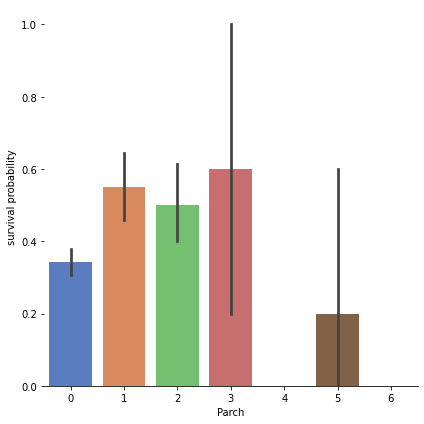

In [ ]:
g = sns.catplot(x="Parch", y="Survived", data=train_data,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

In [ ]:
sns.countplot( x = 'Survived', data = train_data)

In [ ]:
sns.countplot( x = 'Survived', hue = 'Sex', data = train_data)

In [ ]:
sns.countplot( x = 'Survived', hue = 'Pclass', data = train_data)

In [69]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.85 and logs.get('accuracy')>0.8 and logs.get('loss') < 0.4):
            print("\nReached 40% loss so cancelling training!")
            self.model.stop_training = True


In [210]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(250, activation=tf.nn.relu),
    tf.keras.layers.Dense(120, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, x_test, epochs=150)

Epoch 1/150
28/28 [==============================] - 0s 3ms/step - loss: 0.6022 - accuracy: 0.7430
Epoch 2/150
28/28 [==============================] - 0s 3ms/step - loss: 0.5031 - accuracy: 0.7778
Epoch 3/150
28/28 [==============================] - 0s 3ms/step - loss: 0.4803 - accuracy: 0.7789
Epoch 4/150
28/28 [==============================] - 0s 3ms/step - loss: 0.4761 - accuracy: 0.7789
Epoch 5/150
28/28 [==============================] - 0s 3ms/step - loss: 0.4683 - accuracy: 0.7834
Epoch 6/150
28/28 [==============================] - 0s 3ms/step - loss: 0.4693 - accuracy: 0.7901
Epoch 7/150
28/28 [==============================] - 0s 3ms/step - loss: 0.4671 - accuracy: 0.7890
Epoch 8/150
28/28 [==============================] - 0s 3ms/step - loss: 0.4585 - accuracy: 0.7767
Epoch 9/150
28/28 [==============================] - 0s 4ms/step - loss: 0.4582 - accuracy: 0.7924
Epoch 10/150
28/28 [==============================] - 0s 3ms/step - loss: 0.4530 - accuracy: 0.7935
Epoch 11/

In [159]:
model.evaluate(y_train, y_test)


3/3 [==============================] - 0s 3ms/step - loss: 0.3493 - accuracy: 0.8352


[0.3492985963821411, 0.8351648449897766]

In [211]:
result = tf.argmax(model.predict(export_test_data),1).numpy()

In [212]:
result = np.array(result, dtype=np.int)
result = result.reshape(418, 1)
print(export_ids.shape, result.shape)
structuredArr = np.concatenate((export_ids, result), axis=1)

(418, 1) (418, 1)


In [213]:
print(result[:10])

[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]]


In [216]:
np.savetxt('struct_array1.csv', structuredArr, delimiter=',', fmt=['%i' , '%i'], header='PassengerId,Survived', comments='')